In [1]:
import pandas_datareader as pdr

In [2]:
key = 'dff16888d790ec7e9059b33234da45d5b684be86'

In [10]:
# df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [11]:
df.to_csv('data.csv')

In [12]:
import pandas as pd
df = pd.read_csv('data.csv')

In [13]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-06-26 00:00:00+00:00,145.82,148.28,145.3800,147.17,25524661,34.504451,35.086545,34.400336,34.823892,102098644,0.0,1.0
1,AAPL,2017-06-27 00:00:00+00:00,143.73,146.16,143.6200,145.01,24423643,34.009907,34.584903,33.983879,34.312785,97694572,0.0,1.0
2,AAPL,2017-06-28 00:00:00+00:00,145.83,146.11,143.1601,144.49,21915939,34.506817,34.573071,33.875056,34.189741,87663756,0.0,1.0
3,AAPL,2017-06-29 00:00:00+00:00,143.68,145.13,142.2800,144.71,31116980,33.998076,34.341180,33.666803,34.241798,124467920,0.0,1.0
4,AAPL,2017-06-30 00:00:00+00:00,144.02,144.96,143.7800,144.45,22328979,34.078528,34.300954,34.021738,34.180276,89315916,0.0,1.0


In [39]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-06-16,130.06,132.390,129.04,132.080,107961508,130.06,132.390,129.04,132.080,107961508,0.0,1.0
1254,AAPL,2022-06-17,131.56,133.079,129.81,130.065,134520290,131.56,133.079,129.81,130.065,134520290,0.0,1.0
1255,AAPL,2022-06-21,135.87,137.060,133.32,133.420,81000488,135.87,137.060,133.32,133.420,81000488,0.0,1.0
1256,AAPL,2022-06-22,135.35,137.760,133.91,134.790,73409234,135.35,137.760,133.91,134.790,73409234,0.0,1.0
1257,AAPL,2022-06-23,138.27,138.590,135.63,136.820,72433768,138.27,138.590,135.63,136.820,72433768,0.0,1.0


In [15]:
import re

In [23]:
# Let's change the date format a littlebit
def change_date(date):
    result = re.search(r'^([\d]+-[\d]+-[\d]+)', date)
    return result[1]

In [26]:
df['date'] = df['date'].apply(lambda x : change_date(x))

In [28]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1258 non-null   object        
 1   date         1258 non-null   datetime64[ns]
 2   close        1258 non-null   float64       
 3   high         1258 non-null   float64       
 4   low          1258 non-null   float64       
 5   open         1258 non-null   float64       
 6   volume       1258 non-null   int64         
 7   adjClose     1258 non-null   float64       
 8   adjHigh      1258 non-null   float64       
 9   adjLow       1258 non-null   float64       
 10  adjOpen      1258 non-null   float64       
 11  adjVolume    1258 non-null   int64         
 12  divCash      1258 non-null   float64       
 13  splitFactor  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 137.7+ KB


In [32]:
df.shape

(1258, 14)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='date', ylabel='close'>

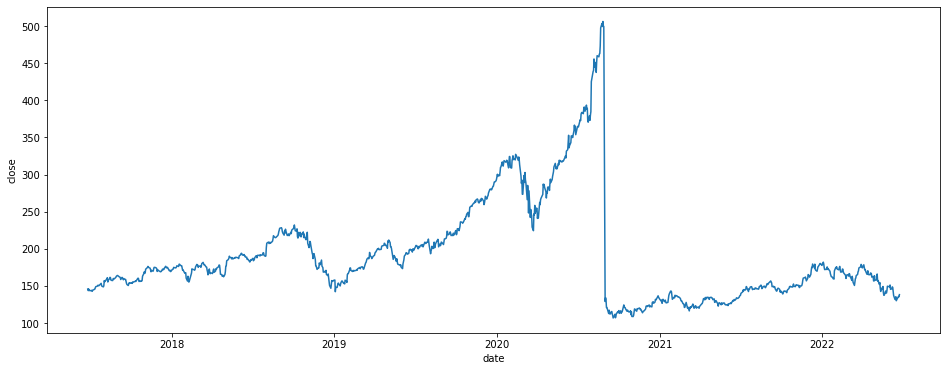

In [41]:
plt.figure(figsize=(16, 6))
sns.lineplot(data = df, x = 'date', y = 'close',)

In [69]:
# This is unbelieveable fall during the mid of 2020

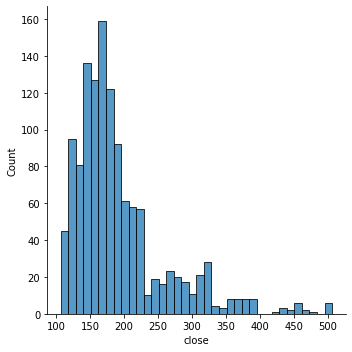

In [44]:
sns.displot(df['close'])

In [113]:
import numpy as np
close_price = np.array(df['close'])

In [114]:
close_price

array([145.82, 143.73, 145.83, ..., 135.87, 135.35, 138.27])

In [115]:
# Now divide the data into train and test split
training_size = int(len(close_price)*0.7)
train, test = close_price[:training_size], close_price[training_size:]

In [123]:
train = train.reshape(-1, 1)
test = test.reshape(-1, 1)

In [124]:
train

array([[145.82    ],
       [143.73    ],
       [145.83    ],
       [143.68    ],
       [144.02    ],
       [143.5     ],
       [144.09    ],
       [142.73    ],
       [144.18    ],
       [145.06    ],
       [145.53    ],
       [145.74    ],
       [147.77    ],
       [149.04    ],
       [149.56    ],
       [150.08    ],
       [151.02    ],
       [150.34    ],
       [150.27    ],
       [152.09    ],
       [152.74    ],
       [153.46    ],
       [150.56    ],
       [149.5     ],
       [148.73    ],
       [150.05    ],
       [157.14    ],
       [155.57    ],
       [156.39    ],
       [158.81    ],
       [160.08    ],
       [161.059998],
       [155.32    ],
       [157.48    ],
       [159.85    ],
       [161.6     ],
       [160.95    ],
       [157.86    ],
       [157.5     ],
       [157.21    ],
       [159.78    ],
       [159.98    ],
       [159.27    ],
       [159.86    ],
       [161.47    ],
       [162.91    ],
       [163.35    ],
       [164. 

In [125]:
# Converting the data in the range of 0 - 1
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(train)
X_test_scaled = scaler.transform(test)

In [128]:
X_train_scaled.shape, X_test_scaled.shape

((880, 1), (378, 1))

In [129]:
X_train_scaled[:10, 0], X_test_scaled[:10, 0]

(array([0.09763306, 0.09239825, 0.09765811, 0.09227301, 0.09312461,
        0.09182217, 0.09329994, 0.08989355, 0.09352536, 0.09572949]),
 array([0.0627176 , 0.06041327, 0.06294302, 0.07476518, 0.07020664,
        0.06732624, 0.0647464 , 0.056531  , 0.06053851, 0.0494928 ]))

In [145]:
def generate_data(data, window = 50):
    X, y = [], []
    for i in range(window, len(data)):
        dt = data[i - window:i, 0]
        X.append(dt)
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [151]:
window_size = 100
X_train_data, y_train = generate_data(X_train_scaled, window_size)
X_test_data, y_test = generate_data(X_test_scaled, window_size)

In [155]:
X_train = X_train_data.reshape(X_train_data.shape[0], X_train_data.shape[1], 1)
X_test = X_test_data.reshape(X_test_data.shape[0], X_test_data.shape[1], 1)

In [156]:
X_train.shape, X_test.shape

((780, 100, 1), (278, 100, 1))

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [163]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss = 'mean_squared_error', optimizer = 'adam',metrics='accuracy')

In [164]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [165]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,batch_size = 64, verbose = 1)

Epoch 1/50
13/13 [==============================] - 33s 1s/step - loss: 0.0392 - accuracy: 0.0013 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 9s 675ms/step - loss: 0.0142 - accuracy: 0.0026 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 10s 742ms/step - loss: 0.0098 - accuracy: 0.0026 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 9s 704ms/step - loss: 0.0097 - accuracy: 0.0026 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 5/50
13/13 [==============================] - 9s 669ms/step - loss: 0.0084 - accuracy: 0.0026 - val_loss: 3.1683e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
13/13 [==============================] - 9s 727ms/step - loss: 0.0095 - accuracy: 0.0026 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 7/50
13/13 [==============================] - 8s 625ms/step - loss: 0.0080 - accuracy: 0.0026 - val_loss: 5.3381e-0

In [180]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [181]:
from sklearn.metrics import mean_squared_error
import math

In [182]:
print("Train MSE: ", math.sqrt(mean_squared_error(train_pred, y_train)))

print("Test MSE: ", math.sqrt(mean_squared_error(test_pred, y_test)))

Train MSE:  0.04006305579993637
Test MSE:  0.014545503695229703


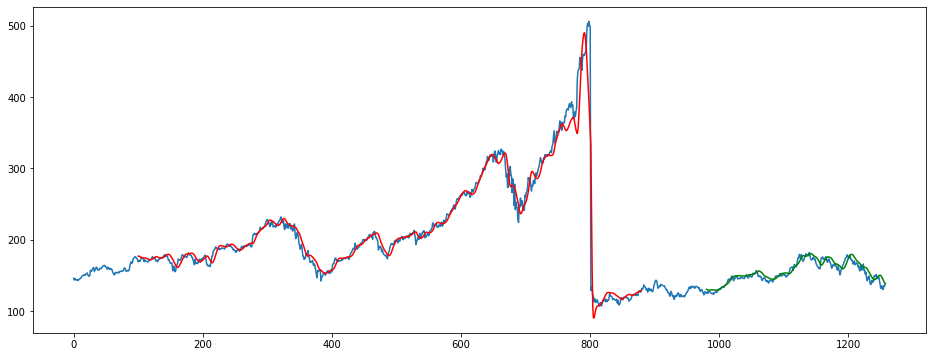

In [201]:

plt.figure(figsize=(16, 6))
plt.plot(close_price)

# training data
pred_train = np.empty_like(close_price,shape=(len(close_price), 1))
pred_train[:, 0] = np.nan
pred_train[window_size: train_pred.shape[0] + window_size, 0] = train_pred[:, 0]


# testing data
pred_test = np.empty_like(close_price,shape=(len(close_price), 1))
pred_test[:, 0] = np.nan
pred_test[train_pred.shape[0] + window_size*2: , 0] = test_pred[:, 0]

plt.plot(scaler.inverse_transform(pred_train), c = 'r')
plt.plot(scaler.inverse_transform(pred_test), c = 'g')

plt.show()

In [296]:
last_data = scaler.transform(close_price[-100:].reshape(-1, 1))

def calculate_next(n = 30):
    global last_data
    predicted = []
    for i in range(n):
        pred = model.predict(np.array([last_data[i:]]))
#         print("Day {} value : {} ".format(i+1, pred))
        last_data = np.append(last_data, np.array(pred[0])).reshape(-1, 1)
        predicted.append(pred)
    return np.array(predicted)

In [297]:
next_days = 365
prediction = calculate_next(next_days)

In [298]:
predicted = scaler.inverse_transform(prediction.reshape(-1, 1))

In [299]:
# predicted[:, 0]

In [300]:
# Now plot the next graph
new_close_price = np.append(close_price, np.zeros(next_days))
new_close_price[-1*next_days:] = np.nan

new_pred = np.empty_like(new_close_price)
new_pred[:] = np.nan
new_pred[len(close_price):]= predicted[:, 0]


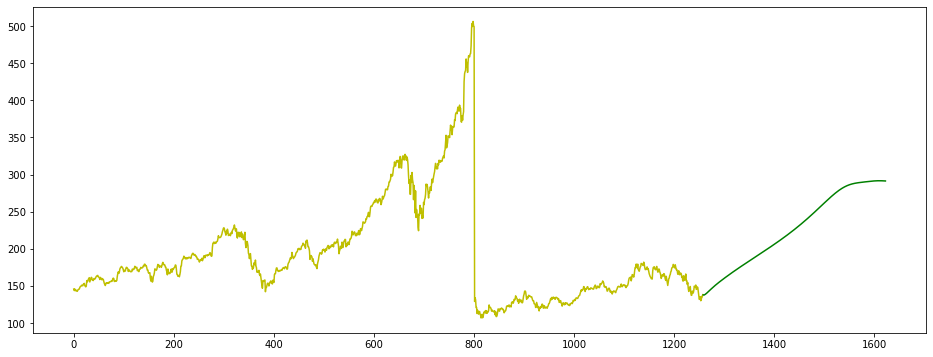

In [301]:
plt.figure(figsize=(16, 6))
plt.plot(new_close_price, c='y')
plt.plot(new_pred, c = 'g')
plt.show()